# Club de karate

In [2]:
import math, subprocess
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os

# Item 2.1
## Centralidad de autovectores

In [3]:
def calcular_centralidad(matriz):
    # Calcular autovectores y autovalores
    autovalores, autovectores = np.linalg.eig(matriz)
    # Obtenemos el autovector más grande que define la centralidad
    autovalor_mas_grande_index = 0
    for i in range(len(autovalores)):
        if autovalores[i] > autovalores[autovalor_mas_grande_index]:
            autovalor_mas_grande_index = i
    autovector_mas_grande = autovectores[autovalor_mas_grande_index]
    return autovector_mas_grande

In [15]:
# Levantamos la matriz
f = open("../tests/karateclub_matriz.txt", "r")
i = 0
matriz_karate=0
for line in f:
    if (i == 0):
        size = len(line.split(" "))
        matriz_karate = np.zeros((size, size))
    matriz_karate[i, :] = [float(current) for current in line.split(" ")]
    i += 1
centralidad = calcular_centralidad(matriz_karate)
print(centralidad)
print("Indice del max:", np.argmax(centralidad))
print("Max:", np.max(centralidad))

[ 3.55491445e-01+0.00000000e+00j  3.86861073e-01+0.00000000e+00j
  3.17169916e-01+0.00000000e+00j  2.77301589e-01+0.00000000e+00j
  5.54684531e-01+0.00000000e+00j -1.97857579e-01+0.00000000e+00j
 -1.71391475e-01+0.00000000e+00j  1.42280887e-02+0.00000000e+00j
 -1.87519478e-03+0.00000000e+00j  6.71078011e-02+0.00000000e+00j
 -5.93336726e-02+0.00000000e+00j -3.80037278e-02+0.00000000e+00j
  1.51425768e-01+0.00000000e+00j -6.33227671e-02+0.00000000e+00j
  1.64565066e-01+0.00000000e+00j -1.43009729e-01+0.00000000e+00j
 -7.32966647e-02+0.00000000e+00j -5.91985700e-02+0.00000000e+00j
 -1.31441171e-01+0.00000000e+00j -1.35951323e-01+0.00000000e+00j
  1.86534978e-01+0.00000000e+00j -7.84950455e-02+0.00000000e+00j
  2.30972542e-02+0.00000000e+00j  1.50802961e-16+0.00000000e+00j
 -5.93050852e-17+0.00000000e+00j -1.38909115e-17+0.00000000e+00j
  2.47491127e-18-1.04494305e-17j  2.47491127e-18+1.04494305e-17j
 -2.67104795e-17-9.51760806e-18j -2.67104795e-17+9.51760806e-18j
 -4.62017149e-17+2.229209

# Item 2.2
## Computar todos los autovectores de la matriz Laplaciana de la red del Club de Karate.

In [6]:
from scipy.sparse.csgraph import laplacian

In [17]:
def metodo_de_la_potencia(matriz):
    return np.linalg.eig(matriz)

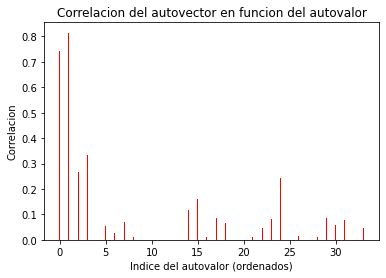

In [30]:
#tengo que leer el vector que representa los grupos despues del conflicto
f = open("../tests/karateclub_labels.txt", "r")
vector_que_representa_al_grupo = np.zeros((size))
i=0
for line in f:
    vector_que_representa_al_grupo[i]=(int(line))
    i=i+1

matriz_laplaciana=laplacian(matriz_karate)

autovalores_laplaciana, autovectores_laplaciana = metodo_de_la_potencia(matriz_laplaciana)
autovectores_laplaciana = autovectores_laplaciana.transpose()
tmp = sorted(zip(autovalores_laplaciana, autovectores_laplaciana), key=lambda x: x[0])
autovalores_laplaciana = [x[0] for x in tmp]
autovectores_laplaciana = [x[1] for x in tmp]
correlaciones = []
for autovector in autovectores_laplaciana:
    correlaciones.append(abs(np.corrcoef(autovector, vector_que_representa_al_grupo)[0,1]))
plt.bar(np.arange(len(autovalores_laplaciana)), correlaciones, color="r", width=.1)
plt.xlabel("Indice del autovalor (ordenados)")
plt.ylabel("Correlacion")
plt.title("Correlacion del autovector en funcion del autovalor")
# plt.savefig('./graficos/correlacion_autovalor.png')
plt.show()
plt.close()